# Fourier series
```{index} Fourier series
```

In this notebook, Python will be used to calculate and generate these Fourier series and transforms.

Waves of any shape can be modelled and described using Fourier series. 

The general Fourier series is of the form:
$y(t) = \frac{a_0}{2} + \sum_{n=1}^{n=\infty} a_n sin(n\omega t) +\sum_{m=1}^{m=\infty} b_m sin(m\omega t) $. 


Here, $$a_0 = \frac{2}{\tau} \int_{0}^{\tau} y(t) dt$$
$$a_n = \frac{2}{\tau} \int_{0}^{\tau} y(t)sin(n\omega t) dt$$
$$b_m = \frac{2}{\tau} \int_{0}^{\tau} y(t)cos(m\omega t) dt$$

Where $\tau$ is the period.

In [2]:
import sympy as sym
from sympy import pi
import matplotlib.pyplot as plt
from scipy.signal import square
import numpy as np
import scipy.integrate as integrate
from scipy import fftpack

## Finding Fourier components

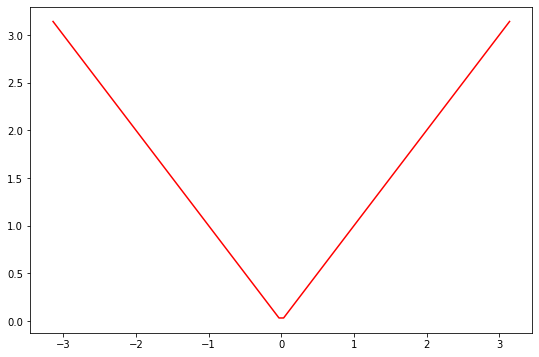

In [3]:
def triangle(x):
    if x>=0:
        return x
    else:
        return -x

def fourier(function, lower_limit, upper_limit, number_terms):
    l = (upper_limit-lower_limit)/2
    a0=1/l*integrate.quad(lambda x: function(x), lower_limit, upper_limit)[0]
    A = np.zeros((number_terms))
    B = np.zeros((number_terms))
     
    for i in range(1,number_terms+1):
        A[i-1]=1/l*integrate.quad(lambda x: function(x)*np.cos(i*np.pi*x/l), lower_limit, upper_limit)[0]
        B[i-1]=1/l* integrate.quad(lambda x: function(x)*np.sin(i*np.pi*x/l), lower_limit, upper_limit)[0]
 
    return [a0/2.0, A, B]

# plot triangle function
plt.figure(figsize=(9,6)) 
x = np.linspace(-np.pi, np.pi, 100)
triangle_values = [triangle(item) for item in x]
plt.plot(x, triangle_values, 'r')

In [4]:
traingle_coeffs = fourier(triangle, -np.pi, np.pi, 3)
print('Fourier coefficients for the Triangular wave for three harmonic numbers\n')
print('a0 ='+str(traingle_coeffs[0]))
print('an ='+str(traingle_coeffs[1]))
print('bn ='+str(traingle_coeffs[2]))

Fourier coefficients for the Triangular wave for three harmonic numbers

a0 =1.5707963267948966
an =[-1.27323954e+00  4.99600361e-16 -1.41471061e-01]
bn =[0. 0. 0.]


## Finding Fourier series using sympy module

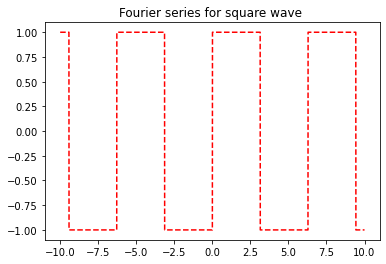

In [5]:
L=10
x=np.arange(-L,L,0.001)
y=square(x) # period of 2pi
plt.plot(x,y,'r--')
plt.title("Fourier series for square wave ")
plt.show()

Figure above:

n(t) = -1, -$\pi$ < t < 0

n(t) = 1, 0< t < $\pi$ 

In [85]:
## Solving Fourier Series in Python
t = sym.symbols('t')

x = sym.Piecewise((-1, t<0), (1, t>0))
series = sym.fourier_series(x, (t, -pi, pi))
series.truncate(5)

4*sin(t)/pi + 4*sin(3*t)/(3*pi) + 4*sin(5*t)/(5*pi) + 4*sin(7*t)/(7*pi) + 4*sin(9*t)/(9*pi)

The series are truncated at 10 components, due to Fourier series being infinite. Adding more components will make the plot look more similar to the box plot above.
**note** that we know the box plot above is an odd function, hence we can assume the Fourier series are made up solely of sine functions, thus the $b_m$ term is zero. If the function is even, we can expect only cosine functions, thus the $a_n$ term is zero.

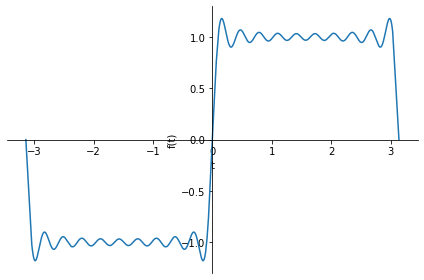

In [86]:
sym.plot(series.truncate(10), (t, -pi, pi))

## Fourier transform
```{index} Fourier transform
```

A fourier tranform changes the domain of a function from time to frequency. Any function can be composed of infinite series like sines and cosines. For example, in the plot above, Fourier series are used to make a box plot out of sine functions. 

In the plot above, the series where truncated at 10 components. In the gif below is shown what happens if more and more components are added.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/af/Fourier_synthesis_square_wave_animated.gif" alt="image info" width="300" 
     height="300"/>

It can be seen that each component is a new function with a certain amplitud and period. These variables of each component can be displayed on a **frequency spectrum**. Decomposing the amplitudes of the components and the period can be done using a fourier transform. In Python, a 'Fast Fourier Transform' can be performed of which a frequency spectrum can be made.

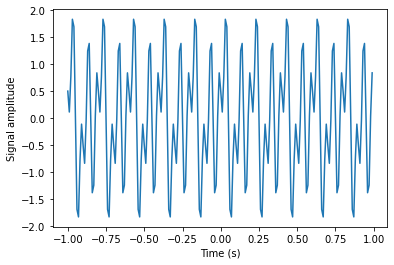

In [87]:
f = 10  # frequency

t = np.linspace(-1, 1, 200, endpoint=False)
x = np.sin(f * 2 * np.pi * t) - np.sin(f * 4 * np.pi * t) + 0.5*np.cos(f * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal amplitude');

Text(0, 0.5, 'Frequency Domain')

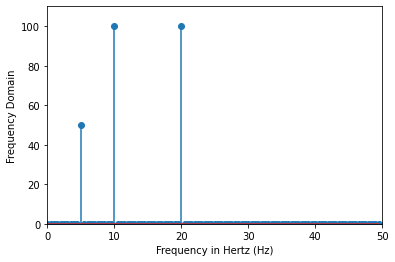

In [88]:
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * 100 # 100 is sampling rate

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlim(0, 50)
ax.set_ylim(0, 110)
ax.set_xlabel('Frequency in Hertz (Hz)')
ax.set_ylabel('Frequency Domain')